#**1. Introduction**

Here we are trying to Identify the factors leading to customer churn and build an ML model that will help us understand the probability to the churn and at the same time help the customer service team to target customers who have high probability to leave and hence forth put can their efforts effectively to prevent churn/ bring in effective customers.

**Import Modules**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Read Dataset**

In [3]:
df= pd.read_csv('https://github.com/V-Vibee/My-Projects/raw/main/Loan/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

**Overall Statistics of Dataset**

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Finding the null values**

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

#**2. Data Preprocessing**

**Removing Irrelevant columns, which are not required**

In [10]:
df= df.drop(['RowNumber','CustomerId', 'Surname'], axis=1)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#**3. Exploratory Data Analysis**

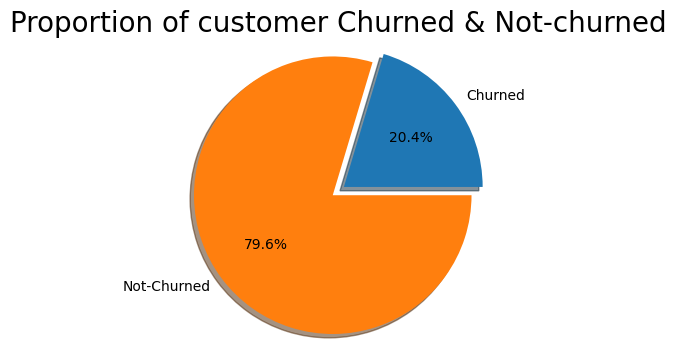

In [17]:
labels = 'Churned', 'Not-Churned'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(5, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')
plt.title("Proportion of customer Churned & Not-churned", size = 20)
plt.show()

**NB:** About 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

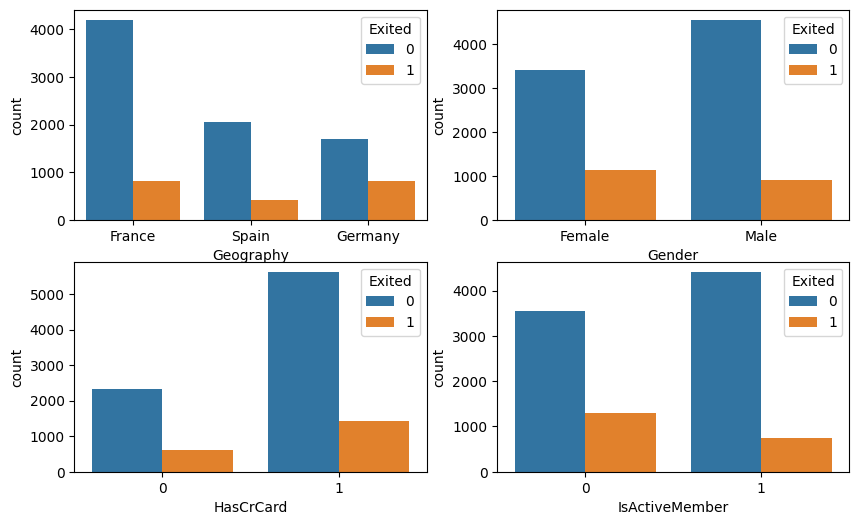

In [26]:
fig, axarr = plt.subplots(2, 2, figsize=(10, 6))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1]);


**Major notes**

* Majority of persond who have churned are from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
* The proportion of female customers churning is also greater than that of male customers.
* Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.
* Surprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.



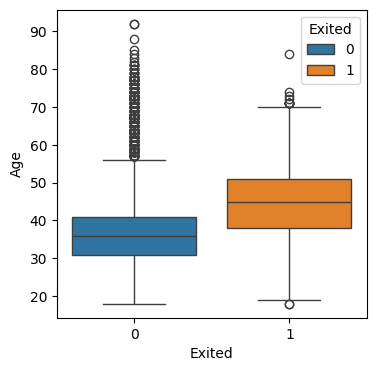

In [44]:
 # plotting boxplot using continuous data
plt.subplots( figsize=(4,4))
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df );


**Note:** The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups

#**4. Handling Categorical data( one hot Encoding)**

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

NB: We are dropping the first value, to get rid of dummy variable trap

In [ ]:
df = pd.get_dummies(df, drop_first= True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


#**4. Handling Imbalanced Data**

**Check the data, to see if variable is usable**

In [ ]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

#**5. Define Target Variable & Features**

In [ ]:
X= df.drop('Exited', axis=1)
y= df['Exited']

**Use SMOTE to handle imbalanced Dataset**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res, y_res= SMOTE().fit_resample(X,y)

In [ ]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

**Now data is balanced**

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_res,y_res, test_size=0.2, random_state=42)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [ ]:
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

#**6. Model Building**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(random_state=42)

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred1= lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_test, y_pred1)

0.775894538606403

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1633
           1       0.76      0.79      0.77      1553

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



**SVC**

In [ ]:
from sklearn import svm
svm= svm.SVC()

In [ ]:
svm.fit(X_train, y_train)

SVC()

In [ ]:
y_pred2= svm.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred2)

0.8408662900188324

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1633
           1       0.84      0.83      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



**KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred3= knn.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred3)

0.8179535467671061

In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1633
           1       0.80      0.83      0.82      1553

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4= dt.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred4)

0.8050847457627118

In [ ]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1633
           1       0.79      0.82      0.80      1553

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred5= rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred5)

0.869428750784683

In [ ]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1633
           1       0.87      0.87      0.87      1553

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred6= gbc.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred6)

0.839924670433145

In [ ]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1633
           1       0.84      0.83      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



#**7. Final Selection**

In [ ]:
final_data= pd.DataFrame({'models':['LogisticRegression', 'SVC', 'KNN', 'DecisionTree', 'RandomForest', 'GradientBoosting'],
                          'ACC': [accuracy_score(y_test, y_pred1),
                                  accuracy_score(y_test, y_pred2),
                                  accuracy_score(y_test, y_pred3),
                                  accuracy_score(y_test, y_pred4),
                                  accuracy_score(y_test, y_pred5),
                                  accuracy_score(y_test, y_pred6)]})

In [ ]:
final_data

,models,ACC
0,LogisticRegression,0.775895
1,SVC,0.840866
2,KNN,0.817954
3,DecisionTree,0.805085
4,RandomForest,0.869429
5,GradientBoosting,0.839925


**Random Forest is the best model among all, hence we would be using this**

In [ ]:
X_res= sc.fit_transform(X_res)

In [ ]:
rf.fit(X_res, y_res)

RandomForestClassifier()

**Save the Model**

In [ ]:
import joblib

In [ ]:
joblib.dump(rf, 'Customer_churn_model')

['Customer_churn_model']

**If we want to use then we have to load**

In [ ]:
model= joblib.load('Customer_churn_model')

In [ ]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [ ]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1])

**This says customer will leave, coz Churn=1**